# Week 2

## Linear Regression with Multiple Variables

Aka *multivariate* linear regression.

### Hypothesis

Multivariate form of the hypothesis:

$$h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n$$

Let introduce $x^{(i)}_0 = 1$ for every $i \in 1,…,n$. We can then write the hypothesis as:

$$h_\theta(x) = \theta_0 x_0 + \theta_1 x_1 + \cdots + \theta_n x_n$$.

Now we can use matrix multiplication to concisely represent the hypothesis as:

$$h_\theta(x) = \begin{bmatrix} \theta_0 & \theta_1 & \ldots & \theta_n \end{bmatrix} \begin{bmatrix} x_0 \\ x_1 \\ \ldots \\ x_n \end{bmatrix} = \theta^T x$$


Note: this was the formula in the lesson, but surely $x$ is a row vector? Well, if we keep $\theta$ as a column vector we can simply use:

$$h_\theta(x) = \begin{bmatrix} x_0 & x_1 & \ldots & x_n \end{bmatrix} \begin{bmatrix} \theta_0 \\ \theta_1 \\ \ldots \\ \theta_n \end{bmatrix} = x\theta$$

Given the training data as a matrix:

$$ X = \begin{bmatrix} x^{(1)}_0 & x^{(1)}_1 \\ x^{(2)}_0 & x^{(2)}_1 \\ x^{(3)}_0 & x^{(3)}_1 \end{bmatrix} $$

And theta $\theta = \begin{bmatrix} \theta_0 \\ \theta_1 \end{bmatrix}$

We can compute the hypothesis as a column vector of size $m \times 1$ with:

$$ h_\theta(X) = X\theta $$

In [255]:
data = [0 4; 1 7; 2 7; 3 8];

X = data(:, 1);
y = data(:, 2);
m = length(y);
theta = [1; 1];

% Add the x_0 column
X = [ ones(m, 1), X ];

h = @(theta, X) X * theta;

% Calculate hypothesis one row at a time.
for i = 1:4
    fprintf("h_theta(x^(%d)) = %f\n", i, X(i, :) * theta);
end

% Calculate the hypothesis for all rows at once.
fprintf("h_theta(X) = \n");
fprintf("%f\n", h(theta, X));

h_theta(x^(1)) = 1.000000
h_theta(x^(2)) = 2.000000
h_theta(x^(3)) = 3.000000
h_theta(x^(4)) = 4.000000
h_theta(X) = 
1.000000
2.000000
3.000000
4.000000


### Cost Function

The cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \big( h_\theta(x^{(i)}) - y^{(i)} \big)^2$$

The vectorized version is

$$ J(\theta) = \frac{1}{2m} (X\theta - \vec{y})^T (X\theta - \vec{y}) $$

Where $\vec{y}$ denotes the vector of all $y$'s.

In [256]:
% theta found by gradient descent in week1. Expected cost ~0.225275.
theta = [ 4.661084; 1.218227 ];

function cost = J(theta, X, y)
    m = length(y);
    cost = (1 / (2 * m)) * (X * theta - y)' * (X * theta - y);
end

J(theta, X, y)

ans =  0.22527


### Gradient Descent

The gradient descent rule can be expressed as:

$$ \theta := \theta - \alpha \nabla J(\theta) $$

Where $\nabla J(\theta)$ is a column vector on the form:

$$ \nabla J(\theta) = \begin{bmatrix} \frac{\partial J(\theta)}{\partial \theta_0} \\ \frac{\partial J(\theta)}{\partial \theta_1} \\ \vdots \\ \frac{\partial J(\theta)}{\partial \theta_n} \\ \end{bmatrix} $$

The $j$-th component of the gradient is the summation of the product of two terms:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \big( h_\theta(x^{(i)}) - y^{(i)} \big) x^{(i)}_j$$

Summation of the product of two terms can often be expressed as a product of two vectors.

Here $x^{(i)}_j$ for $i = 1,\ldots,m$ represents the $m$ elements of the $j$-th column, $\vec{x_j}$, of the training set $X$.

The other term $\big( h_\theta(x^{(i)}) - y^{(i)} \big)$ is the vector of the deviations between the predictions $h_\theta(x^{(i)})$ and the output values $y^{(i)}$.

Rewriting gives us:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \vec{x_j}^T (X\theta - \vec{y}) $$

Thus

$$ \nabla J(\theta) = \frac{1}{m} X^T (X\theta - \vec{y}) $$

Finally this gives us the vectorized version of the gradient descent rule:

$$ \theta := \theta - \tfrac{\alpha}{m} X^T (X\theta - \vec{y}) $$

Yea, kind of confusing, but we got the matrix formula.

In [257]:
% Doing the same as in week1.
iterations = 1500;
alpha = 0.01;

function theta = gradientDescent(theta, X, y, alpha, iterations)
    m = length(y);
    for i = 1:1500 
        theta = theta - (alpha / m) * X' * (X * theta - y);
    end
end

% Expecting theta [ 4.661084; 1.218227 ]
theta = gradientDescent([0; 0], X, y, alpha, iterations)

theta =

   4.6611
   1.2182



## Feature Normalization

Speed up gradient descent by having each of the input values *roughly* in the same range.

Ideally $-1 \le x_{(i)} \le 1$ or $-0.5 \le x_{(i)} \le 0.5$.

Two techniques to achieve this
- feature scaling (divide input values by the range)
- mean normalization (subtract average value)

Adjust input values according to the formula:

$$ x_i := \frac{x_i - \mu_i}{s_i} $$

Where $\mu_i$ is the average of all values for feature $i$ and $s_i$ is the range (max - min), or the standard deviation.

In [318]:
featureNormalize = @(X) (X - mean(X)) ./ (max(X) - min(X));

data_norm = featureNormalize(data)
y_norm = data_norm(:, 2);

data_norm =

  -0.50000  -0.62500
  -0.16667   0.12500
   0.16667   0.12500
   0.50000   0.37500



## Polynomial Regression

We can improve the form of our hypothesis function in a couple of different ways.

We can **combine** multiple features into one, for example combining $x_1$ and $x_2$ into $x_3$ by taking $x_1x_2$.

The hypothesis function does not need to be linear either. We can make it quadratic, cubic or square root (or any other form).

For example, if the hypothesis is $h_\theta(x) = \theta_0 + \theta_1 x_1$, then we can create additional features based on $x_1$. To get a quadratic function: $h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_1^2$.

In [317]:
X_2 = [ data(:, 1), data(:, 1).^2 ];
X_2 = [ ones(m, 1), featureNormalize(X_2)];
theta_2 = gradientDescent([0; 0; 0], X_2, y_norm, alpha, iterations);
J(theta_2, X_2, y_norm)

ans =  0.018905


Looks like a better fit!

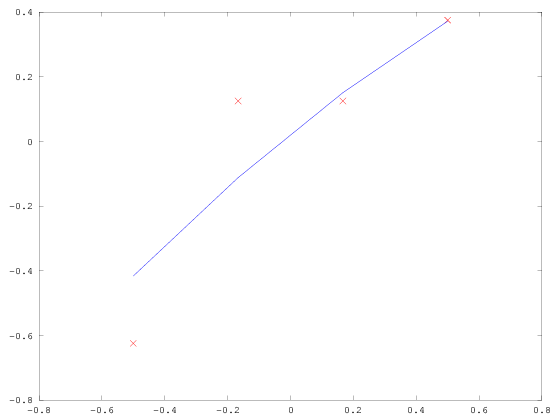

In [263]:
plot(data_norm(:, 1), data_norm(:, 2), 'rx');
hold on;
plot(data_norm(:, 1), h(theta_2, X_2, y_norm));
hold off;

Maybe try cubic $h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_1^2 + \theta_3 x_1^3$.

ans =  0.0031823


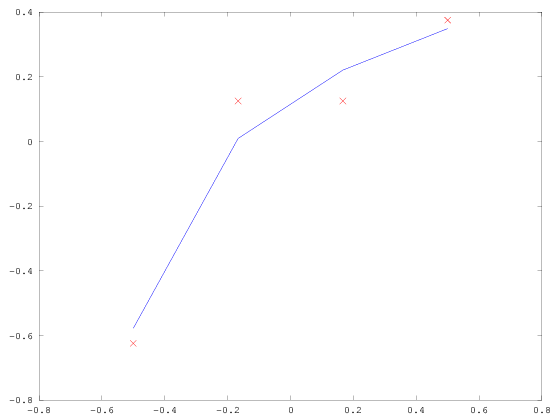

In [315]:
X_3 = [ data(:, 1), data(:, 1).^2, data(:, 1).^3 ];
X_3 = [ ones(m, 1), featureNormalize(X_3) ];
theta_3 = gradientDescent([0; 0; 0; 0], X_3, y_norm, 1.9, 1000000);
J(theta_3, X_3, y_norm)
plot(data_norm(:, 1), data_norm(:, 2), 'rx')
hold on;
plot(data_norm(:, 1), h(theta_3, X_3, y_norm));

## Normal Equation

We can find the optimal theta analytically by the normal equation:

$$ \theta = (X^TX)^{-1}X^Ty $$

The normal equation is $\mathcal{O}(n^3)$ (gradient descent is $\mathcal{O}(kn^2)$, so the normal equation is much slower when you have many features.

Note that the normal equation calculates the inverse of $X^TX$. This matrix may be *noninvertible*, usually because:
- Two (or more) features are linearly dependent.
- To many features (e.g. $m \le n$).

Solutions to the above problems include deleting linearly dependent features or deleting features if there are too many.

linear h: 0.014062
quadratic h: 0.006250
cubic h: 0.000000


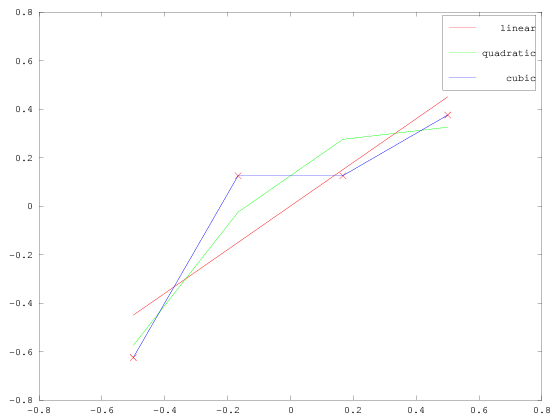

In [321]:
% Note: use pseudoinverse.
normalEquation = @(X, y) pinv(X' * X) * (X' * y);

X_1 = [ ones(m, 1), data(:, 1) ];

theta_1 = normalEquation(X_1, y_norm);
fprintf("linear h: %f\n", J(theta_1, X_1, y_norm));

theta_2 = normalEquation(X_2, y_norm);
fprintf("quadratic h: %f\n", J(theta_2, X_2, y_norm));

theta_3 = normalEquation(X_3, y_norm);
fprintf("cubic h: %f\n", J(theta_3, X_3, y_norm));

plot(data_norm(:, 1), data_norm(:, 2), 'rx');
hold on;
plot(data_norm(:, 1), h(theta_1, X_1, y_norm), 'r;linear;');
plot(data_norm(:, 1), h(theta_2, X_2, y_norm), 'g;quadratic;');
plot(data_norm(:, 1), h(theta_3, X_3, y_norm), 'b;cubic;');
hold off;